In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from data import get_data
from neuralNet import FeedForwardNet
from trainNet import train
from validation import validate_and_plot
from terminalNet import *
import numpy as np
import crocoddyl
import torch
from crocoddyl_vs_crocddyl_terminal_model import *
from utils import *

In [3]:
# If you want to generate a new trained model, uncomment the lines below.
#torchNet = train(nhiddenUnits = 256, epochs= 10000, batchsize = 1000, lr = 1e-4)
# else:
torchNet = torch.load("Network.pth")


Mean Squared Error during testing is 0.0071262153796851635
......................................................................

 Plot of ddp.cost from plain crocoddyl and cost predicted by Neural Network


<Figure size 432x288 with 0 Axes>

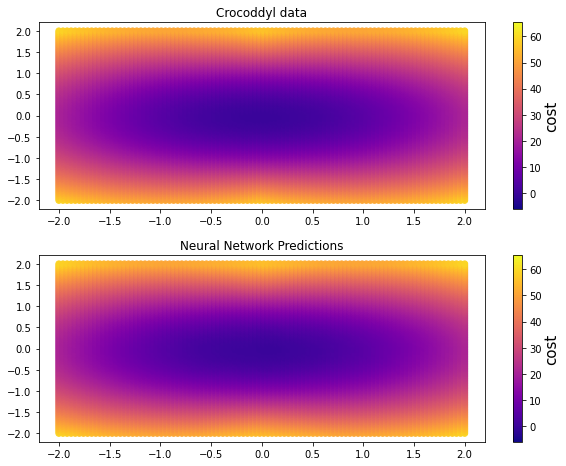

Plotting scatter of error between ddp.cost and cost predicted by Neural Net


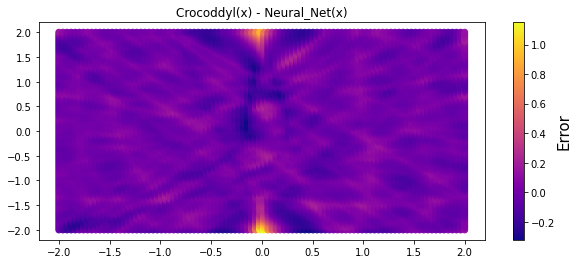

In [4]:
validate_and_plot(torchNet)

## Neural Network included inside crocoddyl

There are two kinds of plots here.

1. Plots corresponding to plain crocoddyl

2. Plots corresponding to crocoddyl with terminal net inside it

In [ ]:
# plot_comparision should take around 10 minutes to run.
plot_comparisions(torchNet, 50, "comparisions.png")

# Just loading the plots
#import IPython.display as display
#from PIL import Image
#image_path = 'comparisions.png'
#display.display(Image.open(image_path))

In [12]:
# Get the trajectories with the corresponding cost and iterations from crocoddyl with terminalNet inside it.
cost, trajectories, iterations = trajectories_terminal_net(torchNet)

# Trajectories from plain crocoddyl
ddp_cost, ddp_trajectories, ddp_iterations = trajectories_crocoddyl()

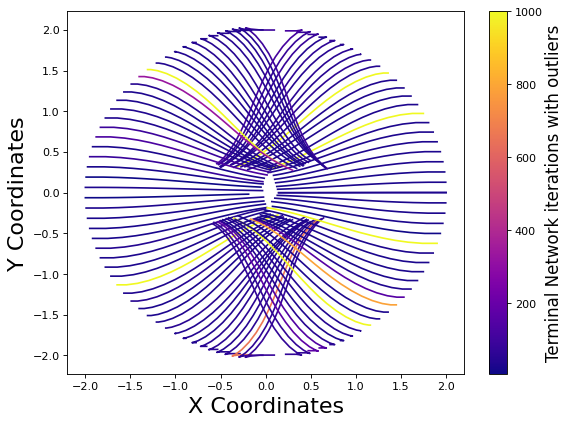

In [13]:
# Trajectories colored according to iterations it took.
plot_trajectories(iterations, trajectories, "Terminal Network iterations with outliers")
#plot_trajectories(ddp_iterations, ddp_trajectories, "Crocoddyl Iterations")

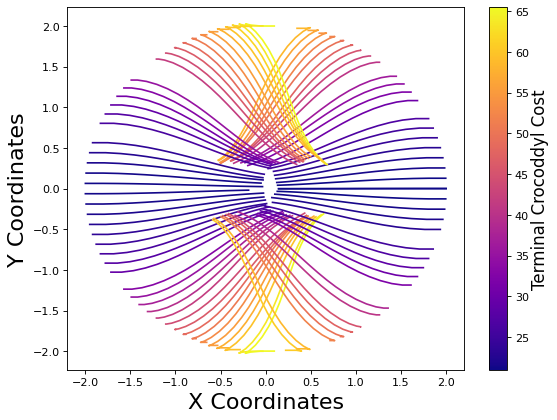

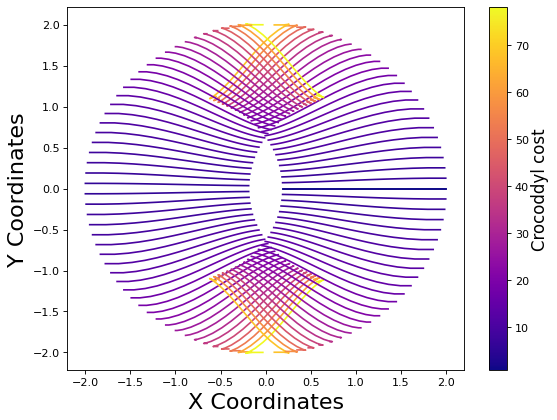

In [10]:
# Trajectories colored according to cost
plot_trajectories(cost, trajectories, "Terminal Crocoddyl Cost")
plot_trajectories(ddp_iterations, ddp_trajectories, "Crocoddyl cost")